In [120]:
import requests
from bs4 import BeautifulSoup as bs

In [121]:
product=input('Enter the product')


Enter the productmi tv


In [122]:
url='https://www.flipkart.com/search?q={}'.format(product)
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
scrap=requests.get(url=url,headers=headers)
data=bs(scrap.text)

# Main Product Page

In [123]:
for i in data.find_all('a',class_='_1fQZEK'):
    href=str(i.get('href'))
    main_url='https://www.flipkart.com'
    sub_url=main_url+href
    reviews_page=sub_url.replace('/p/','/product-reviews/')

# Reviews Page

In [124]:
rev=requests.get(url=reviews_page,headers=headers)
page=bs(rev.text)
rev_pag_num=int(page.find_all('div',class_='_2MImiq _1Qnn1K')[0].text.split('123456')[0].split('of')[-1].strip())

In [125]:
Product_Name=page.find_all('div',class_='_1AtVbE col-10-12')[0].text.split('Reviews')[0]

In [126]:
Rating=page.find_all('div',class_='_3LWZlK')[0].text
Num_of_Ratings=page.find_all('span',class_='_2_R_DZ')[0].text.split('Ratings')[0]
Price=page.find_all('div',class_='_3I9_wc')[0].text

In [127]:
reviews=[]
for i in range(rev_pag_num):
    for i in page.find_all('div',class_='col _2wzgFH K0kLPL'):
        reviews.append(i.text.split('READ MORE')[0])

In [128]:
rev_rating=[]
for i in reviews:
    rev_rating.append(i[0][0])

In [129]:
review=[]
for i in reviews:
    review.append(i.split(i[0])[-1])

# DataFrame

In [130]:
import pandas as pd

In [131]:
df=pd.DataFrame(zip(review,rev_rating),columns=['Review','Review_Rating'])

# word cloud

In [156]:
result=' '.join(review)

In [157]:
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

In [158]:
stop_w=set(STOPWORDS)

In [159]:
wc=WordCloud(stopwords=stop_w,).generate(result)

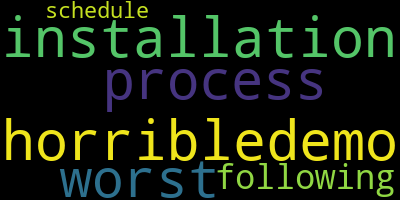

In [160]:
wc.to_image()

# Sentiment Analysis


In [132]:
df['Review_Rating'].value_counts()

5    1675
4    1005
1     670
Name: Review_Rating, dtype: int64

In [100]:
n_df=df[(df['Review_Rating']=='5') |(df['Review_Rating']=='1')]

In [92]:
n_df['Review_Rating'].replace({'5':1,"1":0},inplace=True)

C:\Users\gusai\AppData\Local\Temp\ipykernel_19480\2235786162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df['Review_Rating'].replace({'5':1,"1":0},inplace=True)


In [93]:
n_df.reset_index(drop=True,inplace=True)

In [94]:
n_df.head()

,Review,Review_Rating
0,Did not meet expectationsI got defective produ...,0
1,Excellentawesome,1
2,Highly recommendedIts good as expected,1
3,star rating great sir 🌹,1
4,"Fabulous!Thanks Flipkart, good product,This is...",1


In [133]:
import re
from nltk.stem.porter import PorterStemmer

In [134]:
ps=PorterStemmer()

In [176]:
df.to_csv('Reviews.csv')

In [136]:
corpus=[]

for i in range(len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review=review.lower()
    review=review.split()
    corpus.append(review)
    
   
    
    

In [138]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2))
X=cv.fit_transform(' '.join(words) for words in corpus)


In [106]:
from sklearn.model_selection import train_test_split

In [162]:
x_train,x_test,y_train,y_test=train_test_split(X,df['Review_Rating'],test_size=0.2)

In [163]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [164]:
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [165]:
y_pred=classifier.predict(x_test)

In [168]:
from sklearn.svm import SVC

In [169]:
cl=SVC()

In [170]:
cl.fit(x_train,y_train)

SVC()

In [171]:
svc_pred=cl.predict(x_test)

In [148]:
from sklearn.model_selection import KFold,cross_val_score

In [150]:
scores = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy')

In [151]:
scores.mean()

1.0

In [73]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [172]:
classification_report(y_test,svc_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00       126\n           4       1.00      1.00      1.00       205\n           5       1.00      1.00      1.00       339\n\n    accuracy                           1.00       670\n   macro avg       1.00      1.00      1.00       670\nweighted avg       1.00      1.00      1.00       670\n'

In [174]:
confusion_matrix(y_test,svc_pred)

array([[126,   0,   0],
       [  0, 205,   0],
       [  0,   0, 339]], dtype=int64)

In [154]:
accuracy_score(y_test,y_pred)

1.0

In [155]:
y_test.unique()

array(['4', '1', '5'], dtype=object)